<a href="https://colab.research.google.com/github/Noor218/DL-Assignment/blob/main/Deep_Learning_Multi_Classification_used_the_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#All these images in Numpy Arrays
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show>

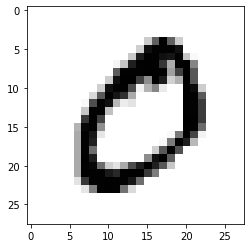

In [ ]:
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.show

In [ ]:
train_labels[4]

9

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#60000 images for training
len(train_images)

60000

In [ ]:
#10000 images for testing.
len(test_images)

10000

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
28*28

784

Models and layers 

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
#Sequential|
network = models.Sequential()

In [ ]:
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
#compilation
network.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Very Important Step
train_images = train_images.reshape((60000, 28*28)) #ye 784 vector ka ek array ban gia
train_images = train_images.astype('float32')/255   # 1D array change


test_images = test_images.reshape((10000, 28*28)) #ye 784 vector ka ek array ban gia
test_images = test_images.astype('float32')/255 # 1D array change 


#One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical (test_labels)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:

test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#Network Structure is ready and data is also ready

In [ ]:
network.fit ( train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2602 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1047 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0689 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0380 - accuracy: 0.9890


In [ ]:
#Now Testing the performance of model on Test Data
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9817


In [ ]:
#Now predict the values. and check the accuracy
network.predict(test_images[1].reshape(1,784))

array([[8.7171478e-11, 6.5462245e-07, 9.9999917e-01, 1.2085464e-07,
        5.7897754e-18, 4.4633413e-09, 3.7652098e-10, 2.5746059e-16,
        1.2839554e-08, 5.6751335e-16]], dtype=float32)

0


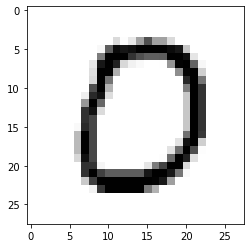

In [ ]:
Index = 10
plt.imshow(test_images[Index].reshape(28,28),cmap='Greys')
result = network.predict(test_images[Index].reshape(1,784))
print(result.argmax())

1


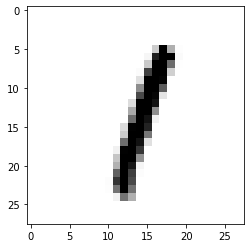

In [ ]:
Index = 5
plt.imshow(test_images[Index].reshape(28,28),cmap='Greys')
result = network.predict(test_images[Index].reshape(1,784))
print(result.argmax())